In [ ]:
#Step-1 Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #splits data into train and test to evaluate on unseen data.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Step 2 — Loading the dataset

In [3]:
df = pd.read_csv("Iris.csv")

# If the CSV has an Id column (just a row identifier), droping it because it provides no learning signal.
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

print(df.head()) #prints the first 5 rows so you can visually check the data.

print(df["Species"].value_counts()) #prints how many examples of each species are present, it useful to see class balance.


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


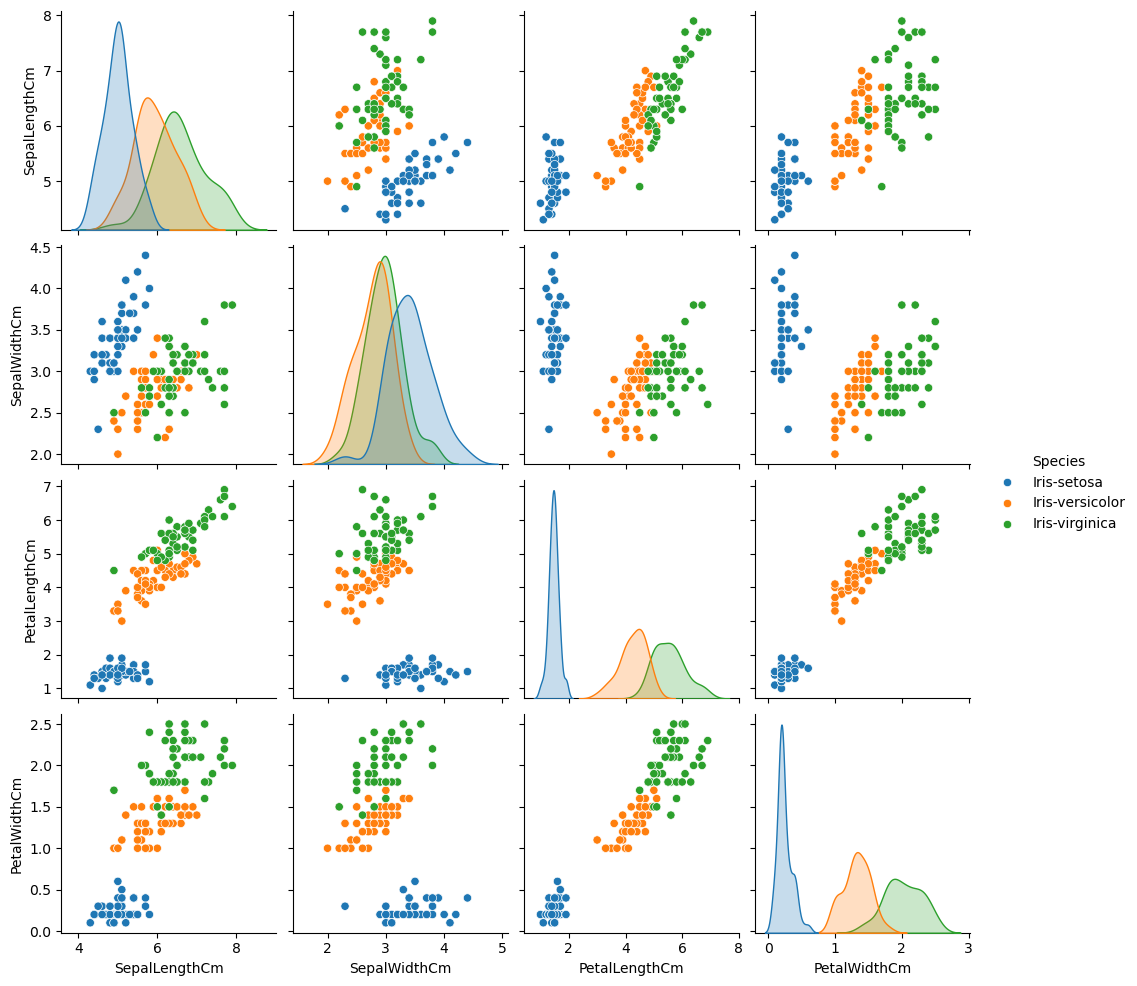

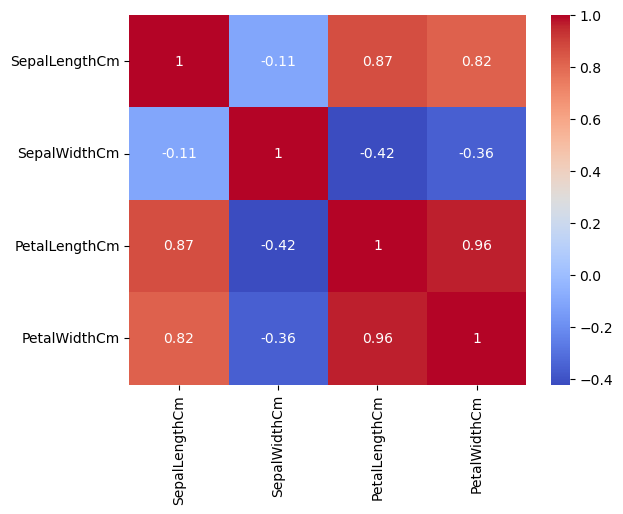

In [5]:
# Pairplot
sns.pairplot(df, hue="Species") # draws scatterplots of every numeric feature

plt.show() #displays the plot.

# Correlation heatmap (numeric only)
sns.heatmap(df.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

#df.drop("Species", axis=1) removes the non-numeric Species column.

#.corr() computes pairwise Pearson correlations between numeric columns.

#sns.heatmap(..., annot=True) draws a colored matrix of correlations and writes the numeric values (annot=True).

# cmap="coolwarm" chooses the color palette.

In [ ]:
# Step - 4 Preparing the data

In [7]:
X = df.drop("Species", axis=1) #X is the features (sepal & petal measurements).

y = df["Species"] #y is the target labels (species names).

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y #Splits data into training (80%) and testing (20%).
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [ ]:
Step 5: Pick the best model

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200), ## Find the model with highest accuracy
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)
    acc = accuracy_score(y_test, preds)
    print(f"{name} -> Accuracy: {acc:.2f}")


Logistic Regression -> Accuracy: 0.93
Random Forest -> Accuracy: 0.90
KNN -> Accuracy: 0.93
SVM -> Accuracy: 0.97


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



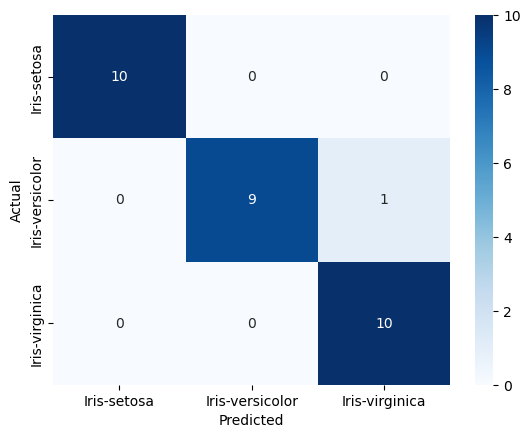

In [9]:
best_model = SVC()   #  replaces with the model with best accuracy

best_model.fit(X_train_s, y_train)

y_pred = best_model.predict(X_test_s)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
import pandas as pd

# Use same feature names as your dataset
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], 
                      columns=X.columns)

sample_scaled = scaler.transform(sample)
print("Prediction:", best_model.predict(sample_scaled)[0])


Prediction: Iris-setosa
